<a href="https://colab.research.google.com/github/kdwang1808/2020-MCM/blob/master/Problem_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 134448 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.17-0ubuntu2~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.17-0ubuntu2~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.17-0ubuntu2~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive
import os
import sys
os.chdir('drive/Colab Notebooks/2020MCM_PC')

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import tqdm as tqdm
from nltk.corpus import stopwords
stop = stopwords.words("english")
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import torchsummary

In [0]:
hair = pd.read_csv("hair.csv")
micro = pd.read_csv("micro.csv")
baby = pd.read_csv("baby.csv")

In [0]:
hair.head(8)

,yy,mm,dd,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,review_headline,review_body
0,2002,3,2,43740490,R2XM83JYE2KDE2,B00005O0MZ,694290590,conair corp pers care 146np conair ionic condi...,3,320,332,"Some pluses, some minuses",This is my only experience with an ionic hair ...
1,2002,7,13,37733836,R3GO6L5PWBS0IW,B00005O0MZ,694290590,conair corp pers care 146np conair ionic condi...,5,4,4,The best dryer!!!,"I love this dryer not only is it QUIET, it rea..."
2,2004,8,15,50473837,R12APPEFY714W7,B00005O0MZ,694290590,conair corp pers care 146np conair ionic condi...,2,5,6,a Bit Disappointed,The on/off switch on this dryer needs improvem...
3,2005,5,25,51785663,R3NZ6I1EKJ9FQL,B0002G214U,685652978,conair soft bonnet hair dryer 1 ea,1,165,168,Very Poor Product,I wish I could have read reviews on this produ...
4,2005,9,15,38641465,R37KYGDKHQ87NK,B0009XH6TG,47684938,"andis 1875-watt fold-n-go ionic hair dryer , s...",4,263,270,"Great product and the only ceramic, ionic blow...","This is the only ceramic, ionic blow dryer wit..."
5,2005,9,22,53027653,RZVHQM7O6L78O,B000ALCJR6,218297570,t3 tourmaline 83808 professional featherweight...,3,80,96,Very light & dries fast but other claims exagg...,I first saw this hair dryer on a TV show talki...
6,2005,10,17,52885265,R2G43OCI39IENW,B000ALCJR6,218297570,t3 tourmaline 83808 professional featherweight...,5,4,4,Super Fast!!,LOVE this hair dryer. My hair used to take fo...
7,2005,12,8,46335577,R1JTW1HKE1A4GP,B000ALCJR6,218297570,t3 tourmaline 83808 professional featherweight...,5,5,7,Never going back,I used this hair dryer at my friends place and...


In [0]:
hair.columns

Index(['yy', 'mm', 'dd', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'star_rating', 'helpful_votes',
       'total_votes', 'review_headline', 'review_body'],
      dtype='object')

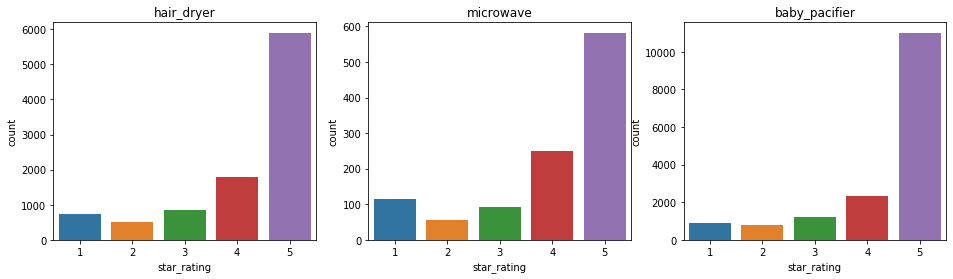

In [0]:
plt.figure(figsize=(16,4))
plt.subplot(131)
sns.countplot(hair['star_rating']).set_title('hair_dryer')
plt.subplot(132)
sns.countplot(micro['star_rating']).set_title('microwave')
plt.subplot(133)
sns.countplot(baby['star_rating']).set_title('baby_pacifier')
plt.savefig('count_rating')

In [0]:
print(hair['yy'].value_counts())
print()
print(micro['yy'].value_counts())
print()
print(baby['yy'].value_counts())

2015    2920
2014    2903
2013    1980
2012     749
2011     445
2010     440
2009     155
2008     109
2007      76
2006      25
2005       6
2002       2
2004       1
Name: yy, dtype: int64

2015    460
2014    342
2013    162
2012     66
2011     27
2010     12
2007      9
2008      8
2004      4
2009      3
2005      2
Name: yy, dtype: int64

2015    5320
2014    5275
2013    3343
2012    1141
2011     763
2010     221
2009      98
2008      69
2007      27
2006       2
2005       2
Name: yy, dtype: int64


In [0]:
# Analyze 2008-2015
hair = hair[(hair['yy']>2007) & (hair['yy']<2016)]
micro = micro[(micro['yy']>2007) & (micro['yy']<2016)]
baby = baby[(baby['yy']>2007) & (baby['yy']<2016)]

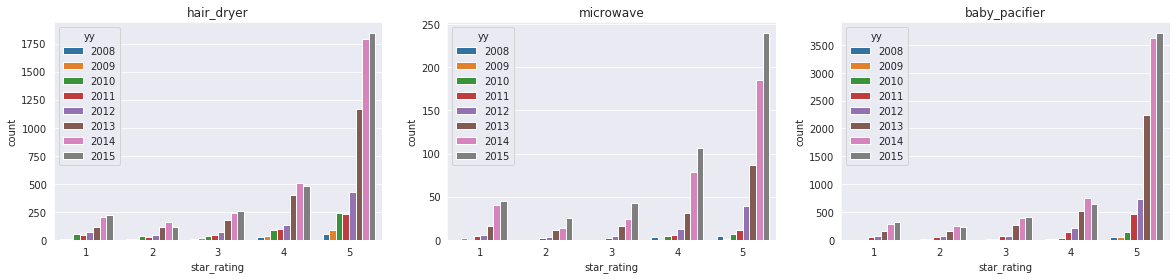

In [0]:
sns.set_style("darkgrid")
plt.figure(figsize=(20,4))
plt.subplot(131)
sns.countplot(hair['star_rating'], hue=hair['yy']).set_title('hair_dryer')
plt.subplot(132)
sns.countplot(micro['star_rating'], hue=micro['yy']).set_title('microwave')
plt.subplot(133)
sns.countplot(baby['star_rating'], hue=baby['yy']).set_title('baby_pacifier')
plt.savefig('count_rating_8year')

In [0]:
hair.reset_index(drop=True, inplace=True)
micro.reset_index(drop=True, inplace=True)
baby.reset_index(drop=True, inplace=True)
hair.to_csv(r'hair.csv', index = False)
baby.to_csv(r'baby.csv', index = False)
micro.to_csv(r'micro.csv', index = False)

In [0]:
print(hair.shape, micro.shape, baby.shape)

(9701, 13) (1080, 13) (16230, 13)


In [0]:
hair.nunique()

yy                    8
mm                   12
dd                   31
customer_id        9639
review_id          9701
product_id          416
product_parent      357
product_title       380
star_rating           5
helpful_votes        80
total_votes          80
review_headline    6344
review_body        9447
dtype: int64

In [0]:
hair.isnull().sum()

yy                 0
mm                 0
dd                 0
customer_id        0
review_id          0
product_id         0
product_parent     0
product_title      0
star_rating        0
helpful_votes      0
total_votes        0
review_headline    2
review_body        0
dtype: int64

In [0]:
hair = hair.drop(['review_id'], axis=1)
micro = micro.drop(['review_id'], axis=1)
baby = baby.drop(['review_id'], axis=1)

In [0]:
hair = hair.drop(['customer_id', 'product_id'], axis=1)
micro = micro.drop(['customer_id', 'product_id'], axis=1)
baby = baby.drop(['customer_id', 'product_id'], axis=1)

In [0]:
hair = hair.drop(['product_title'], axis=1)
micro = micro.drop(['product_title'], axis=1)
baby = baby.drop(['product_title'], axis=1)

In [0]:
hair.head(8)

,yy,mm,dd,product_parent,star_rating,helpful_votes,total_votes,review_headline,review_body
0,2008,1,1,560455235,5,7,8,Simply The Best Blow Dryer on The Market,This is the best standard blow dryer on the ma...
1,2008,1,7,442401590,5,4,6,My new best friend!,With a four year warranty I had to try it and ...
2,2008,1,8,199558933,5,16,17,"Terrific hair dryer, with caveat",Works great; same dryer used by my hair stylis...
3,2008,1,10,199558933,5,2,2,GREAT DRYER,This has cut down on my drying time and is ver...
4,2008,1,11,676407800,5,40,42,Conair 209R Ion Shine(s) for Under $20.00!,You can't get much for $20 these days. Howeve...
5,2008,1,12,676407800,1,11,14,Cord Keeper Breaks!,"I researched all the hairdryers on amazon, and..."
6,2008,1,13,486589264,4,5,6,Hard to believe it could be so good,I bought this dryer based on the user reviews ...
7,2008,1,28,694290590,4,0,0,conair hairdryer,It is okay. It doesn't get hot enough and the ...


In [0]:
hair['product_parent'] = hair['product_parent'].astype('category').cat.codes
micro['product_parent'] = micro['product_parent'].astype('category').cat.codes
baby['product_parent'] = baby['product_parent'].astype('category').cat.codes

In [0]:
hair.head(10)

,yy,mm,dd,product_parent,star_rating,helpful_votes,total_votes,review_headline,review_body
0,2008,1,1,201,5,7,8,Simply The Best Blow Dryer on The Market,This is the best standard blow dryer on the ma...
1,2008,1,7,165,5,4,6,My new best friend!,With a four year warranty I had to try it and ...
2,2008,1,8,75,5,16,17,"Terrific hair dryer, with caveat",Works great; same dryer used by my hair stylis...
3,2008,1,10,75,5,2,2,GREAT DRYER,This has cut down on my drying time and is ver...
4,2008,1,11,241,5,40,42,Conair 209R Ion Shine(s) for Under $20.00!,You can't get much for $20 these days. Howeve...
5,2008,1,12,241,1,11,14,Cord Keeper Breaks!,"I researched all the hairdryers on amazon, and..."
6,2008,1,13,180,4,5,6,Hard to believe it could be so good,I bought this dryer based on the user reviews ...
7,2008,1,28,244,4,0,0,conair hairdryer,It is okay. It doesn't get hot enough and the ...
8,2008,1,29,343,5,2,2,Good and quiet!,This blow dyer is the best and a deal at this ...
9,2008,1,31,343,5,4,4,WOW! Who knew a hair dryer could make such a d...,LOVED this hair dryer! Didn't even need a new ...


In [0]:
hair.to_csv(r'hair.csv', index = False)
baby.to_csv(r'baby.csv', index = False)
micro.to_csv(r'micro.csv', index = False)

In [62]:
np.mean(hair[hair['yy']==2008])['star_rating']

4.091743119266055

In [0]:
hair_mean = pd.Series(hair.groupby('yy')['star_rating'].mean())
micro_mean = pd.Series(micro.groupby('yy')['star_rating'].mean())
baby_mean = pd.Series(baby.groupby('yy')['star_rating'].mean())

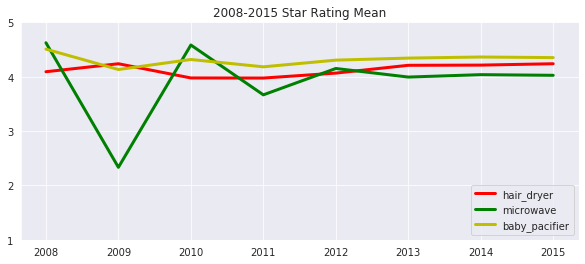

In [114]:
plt.figure(figsize=(10,4))
plt.plot(hair_mean, 'r-', lw=3, label='hair_dryer')
plt.plot(micro_mean, 'g-', lw=3, label='microwave')
plt.plot(baby_mean, 'y-', lw=3, label='baby_pacifier')
plt.yticks(np.array([1,2,3,4,5]))
plt.legend(loc='lower right')
plt.title('2008-2015 Star Rating Mean')
plt.savefig('Rating Mean')